In [8]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pickle
import os

In [9]:
# Load the Dataset
file_path = r"/content/car data.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path)

In [10]:
# Display Dataset Info
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_P

In [11]:
# Feature Engineering
# Calculate car age
current_year = 2025
data['Age'] = current_year - data['Year']
data = data.drop(['Year', 'Car_Name'], axis=1)

In [12]:
# Convert Categorical Variables to Numerical (One-Hot Encoding)
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [15]:
# Define Features and Target
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [18]:
# Save Random Forest Model using pickle
models_dir = r"C:\Users\TEMP\Desktop\New folder"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

rf_model_path = os.path.join(models_dir, "random_forest_model.pkl")

with open(rf_model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"\nRandom Forest Model saved successfully: {rf_model_path}")


Random Forest Model saved successfully: C:\Users\TEMP\Desktop\New folder/random_forest_model.pkl


In [19]:
# Evaluate Random Forest Model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Model Performance:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared: {rf_r2}")


Random Forest Model Performance:
Mean Absolute Error: 0.6368655737704919
R-squared: 0.9594566919773236


<ipython-input-20-85115e6c3fc3>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


Text(0.5, 1.0, 'Random Forest: Actual vs Predicted')

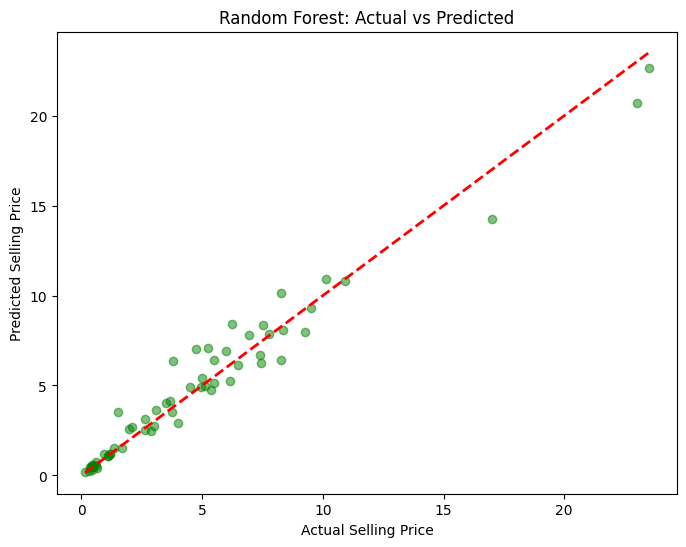

In [20]:
# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Random Forest: Actual vs Predicted')

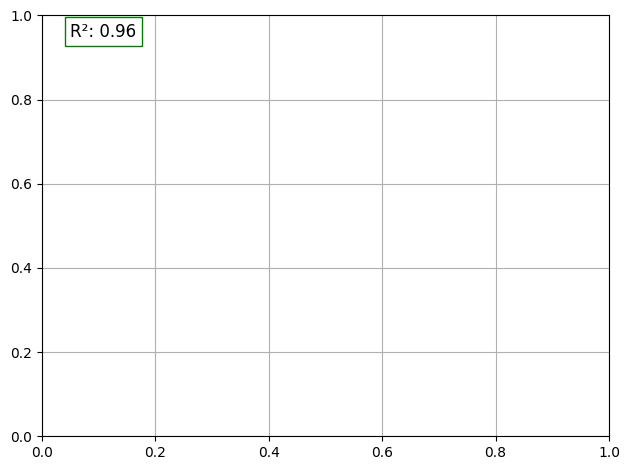

In [21]:
# Display R² score on the plot
plt.text(0.05, 0.95, f"R²: {rf_r2:.2f}", fontsize=12, transform=plt.gca().transAxes, color='black', bbox=dict(facecolor='white', edgecolor='green'))

plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Example: Predict with loaded Random Forest model
print("\nTesting loaded Random Forest model:")
print(f"Random Forest Prediction (First Test Example): {loaded_rf_model.predict([X_test.iloc[0]])[0]}")


# Predict on Unseen Data
unseen_data = pd.DataFrame({
    'Present_Price': [5.59, 9.54],
    'Driven_kms': [27000, 43000],  # Changed to 'Driven_kms'
    'Owner': [0, 0],
    'Age': [10, 8],  # Assuming current year is 2025
    'Fuel_Type_Diesel': [0, 1],
    'Fuel_Type_Petrol': [1, 0],
    'Selling_type_Individual': [0, 0],  # Assuming Dealer (1) or Individual (0)
    'Transmission_Manual': [1, 0]
})

# You might need to add a 'Selling_type_Individual' column to unseen_data:
# If all examples in unseen_data are 'Selling_type_Dealer' == 1 then
# unseen_data['Selling_type_Individual'] = 0

# Predict using the loaded model
unseen_predictions = loaded_rf_model.predict(unseen_data)

# Print predictions
for i, prediction in enumerate(unseen_predictions):
    print(f"Unseen Data Example {i+1}: Predicted Selling Price: {prediction}")


Testing loaded Random Forest model:
Random Forest Prediction (First Test Example): 0.4438
Unseen Data Example 1: Predicted Selling Price: 4.0435000000000025
Unseen Data Example 2: Predicted Selling Price: 7.918800000000005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
